In [1]:
pip install matplotlib seaborn openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
%matplotlib inline

In [ ]:
train_data = pd.read_excel('train_data.xlsx')

In [ ]:
train_data.info() # here we are over looking at the data inthe dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

In [ ]:
train_data.head()

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,10608026,2014-01-01,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,Individual,253.99,Verified,4648,11,0
1,10235120,2014-01-01,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,Individual,233.52,Source Verified,14051,11,1
2,10705805,2014-01-01,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,Individual,287.50,Verified,14885,11,0
3,11044991,2014-01-01,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,Individual,336.22,Source Verified,7542,2,1
4,10161054,2014-01-01,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,Individual,237.80,Verified,6318,11,0


In [ ]:
print(train_data.isnull().sum()) # wew are check if there are any null values to avoid futher problem during training

customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [ ]:
train_data.duplicated(subset='customer_id').sum() # here are checking for dupliacted values

np.int64(0)

In [ ]:
categorical_columns = ['sub_grade', 'purpose', 'home_ownership']  # here we are checking if they are cardinal or not
for col in categorical_columns:
    print(f"\n--- Cardinality of {col} ---")
    print(train_data[col].value_counts())


--- Cardinality of sub_grade ---
sub_grade
C2    12549
C3    12090
C4    11553
C1    10521
C5     9721
D1     8399
D2     6566
D3     5818
D4     5483
D5     4588
E1     4148
E2     3701
B5     3463
E3     3122
E4     2489
E5     2025
F1     1546
B4     1343
F2     1093
F3      961
F4      710
F5      564
G1      418
G2      311
G3      217
G5      156
G4      150
Name: count, dtype: int64

--- Cardinality of purpose ---
purpose
debt_consolidation    71770
credit_card           18830
other                  7351
home_improvement       6865
major_purchase         2060
small_business         1759
medical                1485
moving                 1074
vacation                887
car                     881
house                   642
renewable_energy         95
wedding                   6
Name: count, dtype: int64

--- Cardinality of home_ownership ---
home_ownership
MORTGAGE    53462
RENT        47832
OWN         12411
Name: count, dtype: int64


In [ ]:
loan_status_counts = train_data['loan_status'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Loan Status:")  # check this percent of loands paid and unpaid
print(loan_status_counts)


Percentage Distribution of Loan Status:
loan_status
1    73.889451
0    26.110549
Name: proportion, dtype: float64


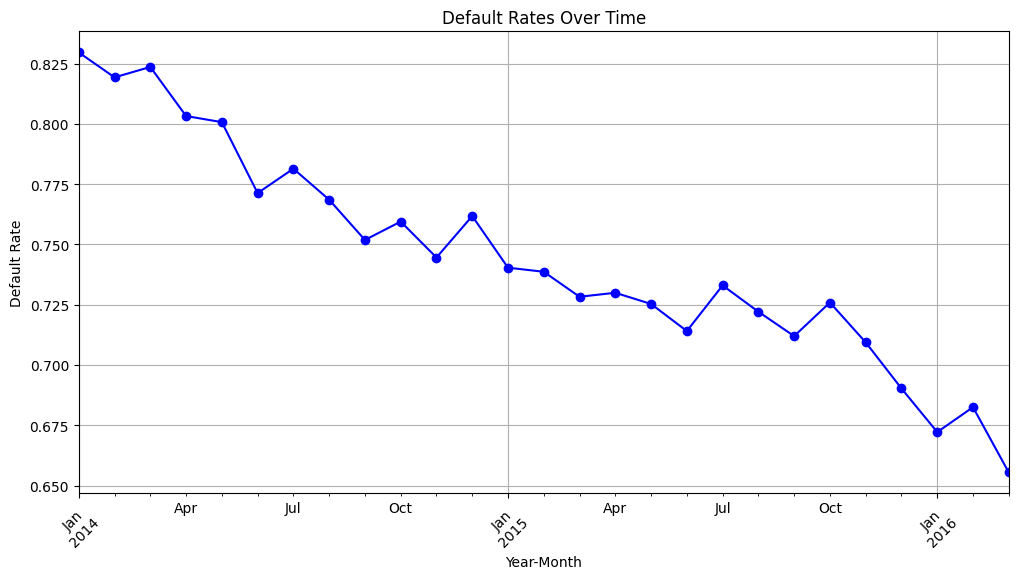

In [ ]:
def process_transaction_date(df):
    df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
    df['year_month'] = df['transaction_date'].dt.to_period('M')  # Year-Month Format
    df['month'] = df['transaction_date'].dt.month  # Extract Month

process_transaction_date(train_data)

# Analyze Default Rates Over Time
defaults_over_time = train_data.groupby('year_month')['loan_status'].mean()
plt.figure(figsize=(12, 6))
defaults_over_time.plot(kind='line', marker='o', color='b')
plt.title('Default Rates Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

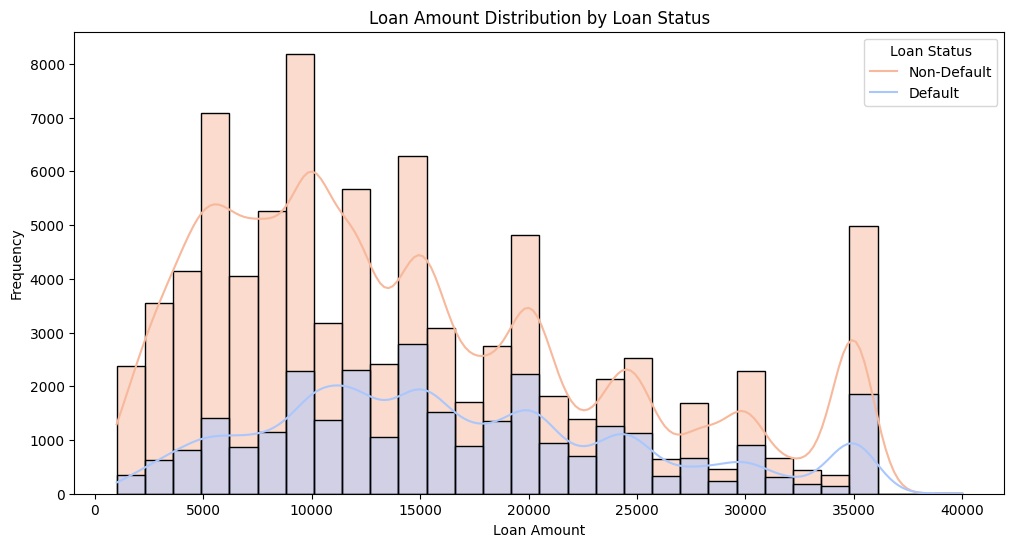

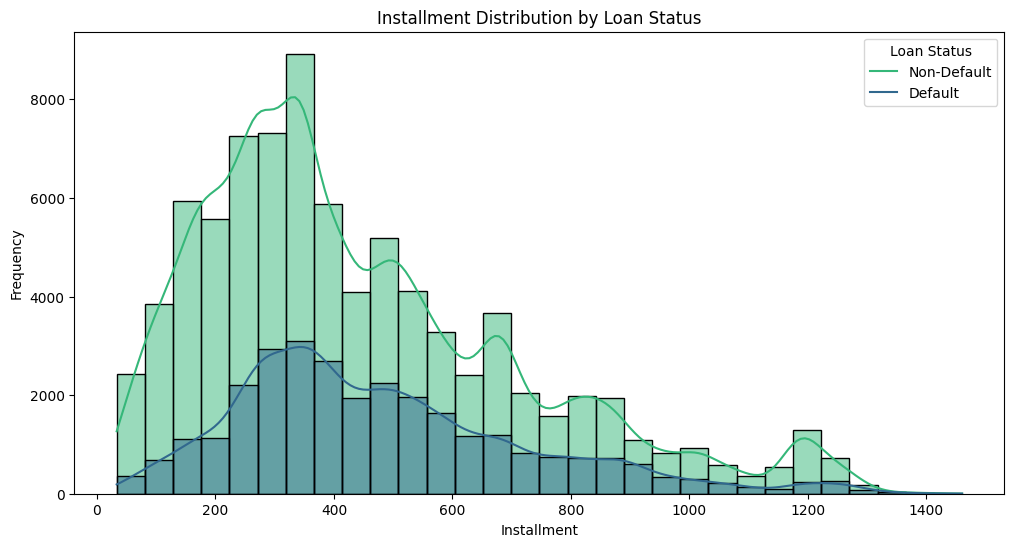

In [ ]:
# This plot visualizes the distribution of loan amounts for different loan statuses (default vs non-default).
# The histogram shows the frequency of loan amounts, with a Kernel Density Estimate (KDE) curve to highlight
# the underlying distribution. The color coding differentiates between defaulted and non-defaulted loans.
# This helps in understanding if certain loan amounts are more prone to default.

plt.figure(figsize=(12, 6))  # Set the figure size for the plot
sns.histplot(
    data=train_data,
    x='loan_amnt',
    hue='loan_status',
    kde=True,
    bins=30,
    palette='coolwarm'
)
plt.title('Loan Amount Distribution by Loan Status')  # Set the plot title
plt.xlabel('Loan Amount')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.legend(title='Loan Status', labels=['Non-Default', 'Default'])  # Add legend with labels
plt.show()  # Display the plot

# This plot visualizes the distribution of installment amounts for different loan statuses (default vs non-default).
# Similar to the loan amount plot, it uses a histogram with a KDE curve to show the underlying distribution.
# The installment variable represents the periodic repayment amount, and this plot helps to analyze its relationship
# with the likelihood of loan default.

plt.figure(figsize=(12, 6))  # Set the figure size for the plot
sns.histplot(
    data=train_data,
    x='installment',
    hue='loan_status',
    kde=True,
    bins=30,
    palette='viridis'
)
plt.title('Installment Distribution by Loan Status')  # Set the plot title
plt.xlabel('Installment')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.legend(title='Loan Status', labels=['Non-Default', 'Default'])  # Add legend with labels
plt.show()  # Display the plot


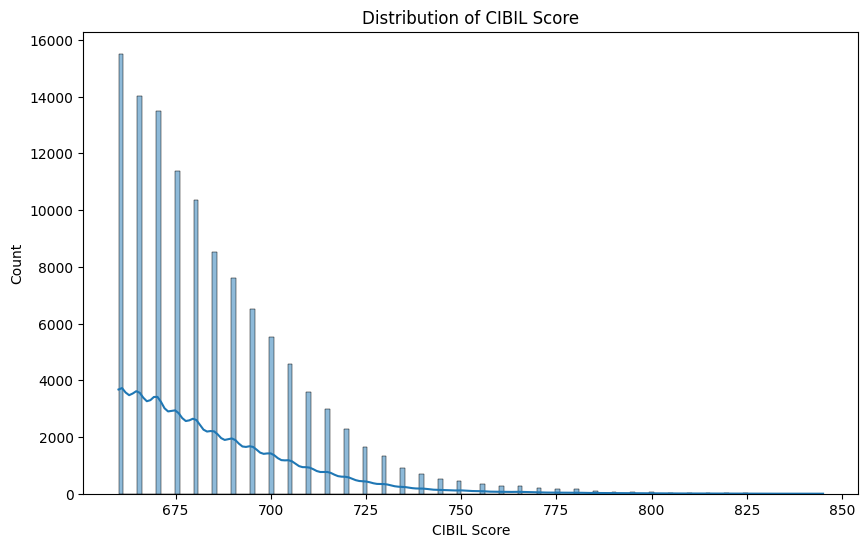

In [ ]:
# Histogram of CIBIL Score
plt.figure(figsize=(10, 6))
sns.histplot(train_data['cibil_score'], kde=True)
plt.title('Distribution of CIBIL Score')
plt.xlabel('CIBIL Score')
plt.ylabel('Count')
plt.show()

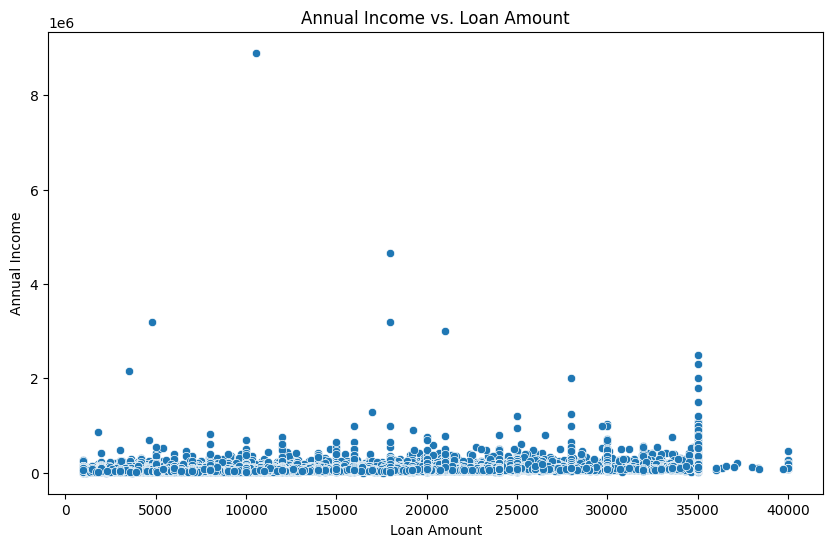

In [ ]:
x = train_data['loan_amnt']
y =  train_data['annual_inc']

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)
plt.title('Annual Income vs. Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.show()

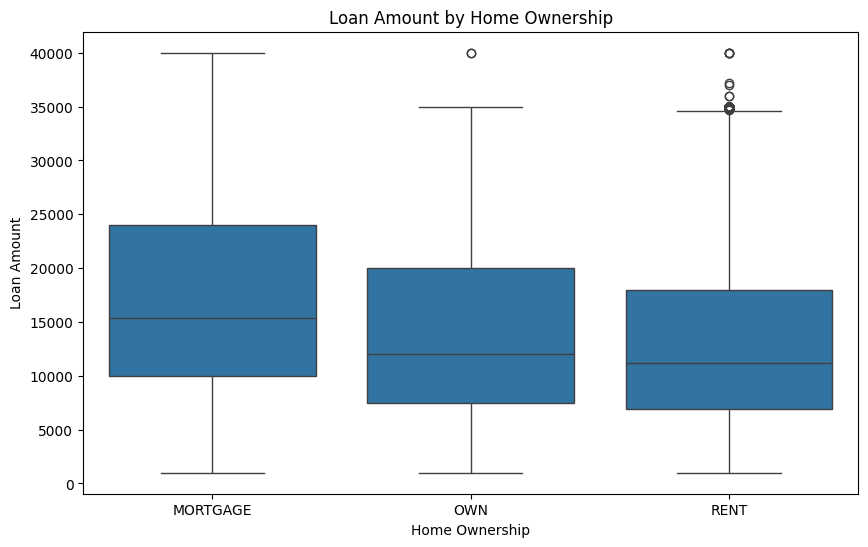

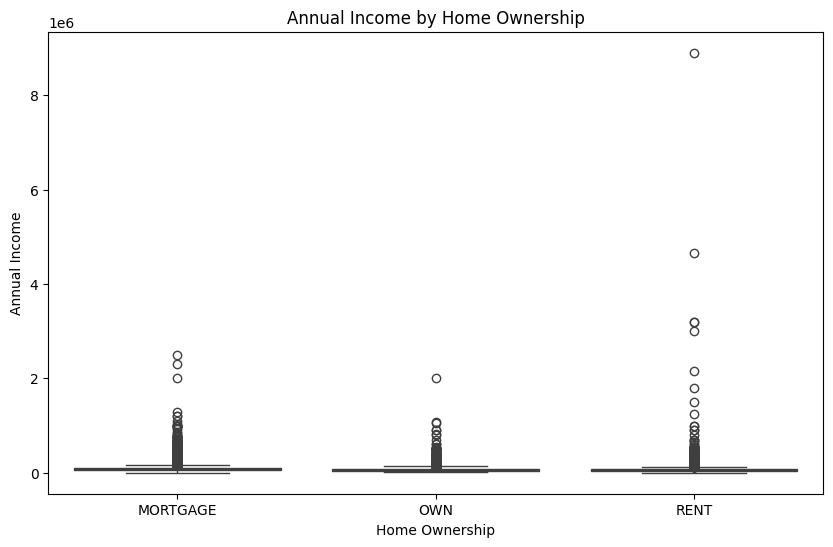

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='home_ownership', y='loan_amnt', data=train_data)
plt.title('Loan Amount by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.show()

# Create box plots for annual income by home ownership
plt.figure(figsize=(10, 6))
sns.boxplot(x='home_ownership', y='annual_inc', data=train_data)
plt.title('Annual Income by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Annual Income')
plt.show()

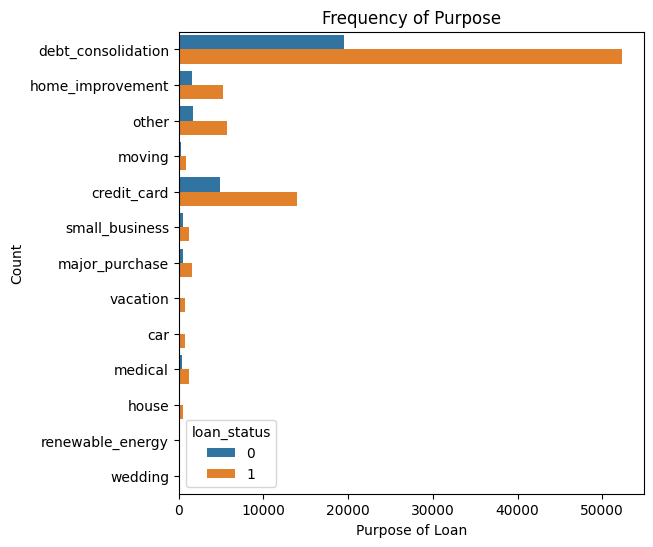

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=train_data, y='purpose', hue='loan_status', orient="x")
plt.title('Frequency of Purpose')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.show()